In [2]:
import pandas as pd

In [242]:
data=pd.read_csv("Data/By_hour/ERA5_Cfa_US_time_00.csv",delimiter=",")

In [243]:
#long_min=min(data.Longitude.iloc[0],data.Longitude.iloc[-1])
#lat_max=max(data.Latitude.iloc[0],data.Latitude.iloc[-1])
data.sample(5)

,Latitude,Longitude,Value,dataDate,dataTime,validityDate,validityTime,shortName
33134595,35.1,-93.4,-0.556091,20160121,0,20160122,0,10u
24905331,32.1,-89.8,278.370117,20100101,0,20100102,0,2t
28139776,32.5,-89.4,3.356230,20120120,0,20120121,0,10v
27262159,38.7,-94.4,277.246338,20110129,0,20110130,0,2t
2272534,31.0,-90.6,283.311035,19910125,0,19910126,0,2t


In [244]:
date=data.validityDate[0]
time=data.validityTime[0]
data_single_time=data[(data.validityTime==time)&(data.validityDate==date)].reset_index()

In [248]:
longitudes=data_single_time.Longitude[(data_single_time.shortName=="10u")].to_numpy()
latitudes=data_single_time.Latitude[(data_single_time.shortName=="10u")].to_numpy()
#print(np.min(longitudes),np.max(longitudes),longitudes.size)
#print(np.min(latitudes),np.max(latitudes),latitudes.size)
#print(np.unique(longitudes))
#print(np.unique(latitudes))
data.head()

10015

In [238]:
red_grid_long=data.Latitude.mod(1)#(data.Longitude-long_min).mod(0.3).round(decimals=2).mod(0.3)
red_grid_lat=data.Latitude.mod(1)#(data.Latitude.mod(0.3)-lat_max).mod(0.3).round(decimals=2).mod(0.3)
red_grid=(red_grid_lat==0)&(red_grid_long==0)
red_grid_data=data[red_grid]

In [239]:
date=red_grid_data.validityDate[0]
time=red_grid_data.validityTime[0]
data_single_time=red_grid_data[(red_grid_data.validityTime==time)&(red_grid_data.validityDate==date)].reset_index()

In [240]:
#Measure the size of one single observation:
print("Size of one data reduced data point")
data_single_time.count

Size of one data reduced data point


<bound method DataFrame.count of       index  Latitude  Longitude          Value  dataDate  dataTime  \
0         0      40.0      -96.0       3.026733  19891231         0   
1         1      40.0      -95.9       3.119507  19891231         0   
2         2      40.0      -95.8       3.212280  19891231         0   
3         3      40.0      -95.7       3.322632  19891231         0   
4         4      40.0      -95.6       3.439819  19891231         0   
...     ...       ...        ...            ...       ...       ...   
4279  40055      30.0      -90.2  101663.750000  19891231         0   
4280  40056      30.0      -90.1  101655.750000  19891231         0   
4281  40057      30.0      -90.0  101636.750000  19891231         0   
4282  40058      30.0      -89.9  101628.750000  19891231         0   
4283  40059      30.0      -89.5  101596.750000  19891231         0   

      validityDate  validityTime shortName  
0         19900101             0       10u  
1         19900101      

In [102]:
#Reshape the data such that the column Value is at the end:
cols=data_single_time.columns.to_list()
cols_perm=cols[:3]+cols[4:]+[cols[3]]
perm_data_single_time=data_single_time[cols_perm]

In [103]:
df_wind_u=perm_data_single_time[perm_data_single_time.shortName=="10u"].reset_index(drop=True)
df_wind_v=perm_data_single_time[perm_data_single_time.shortName=="10v"].reset_index(drop=True)
df_temp=perm_data_single_time[perm_data_single_time.shortName=="2t"].reset_index(drop=True)
df_sp=perm_data_single_time[perm_data_single_time.shortName=="sp"].reset_index(drop=True)

In [104]:

#Rename the value column:
df_wind_u.rename(columns={'Value':'Wind_u'}, inplace=True)
df_wind_v.rename(columns={'Value':'Wind_v'}, inplace=True)
df_temp.rename(columns={'Value':'temp'}, inplace=True)
df_sp.rename(columns={'Value':'sp'}, inplace=True)
#Remove the short name:
df_wind_u.drop(columns=["shortName","index"],inplace=True)
df_wind_v.drop(columns=["shortName","index"],inplace=True)
df_temp.drop(columns=["shortName","index"],inplace=True)
df_sp.drop(columns=["shortName","index"],inplace=True)


In [105]:
merged_data=pd.merge(pd.merge(pd.merge(df_wind_u,df_wind_v),df_temp),df_sp)

In [106]:
X=merged_data[['Longitude','Latitude']].to_numpy()
Y_full=merged_data[['Wind_u','Wind_v','temp','sp']].to_numpy()
Y_wind=merged_data[['Wind_u','Wind_v']].to_numpy()

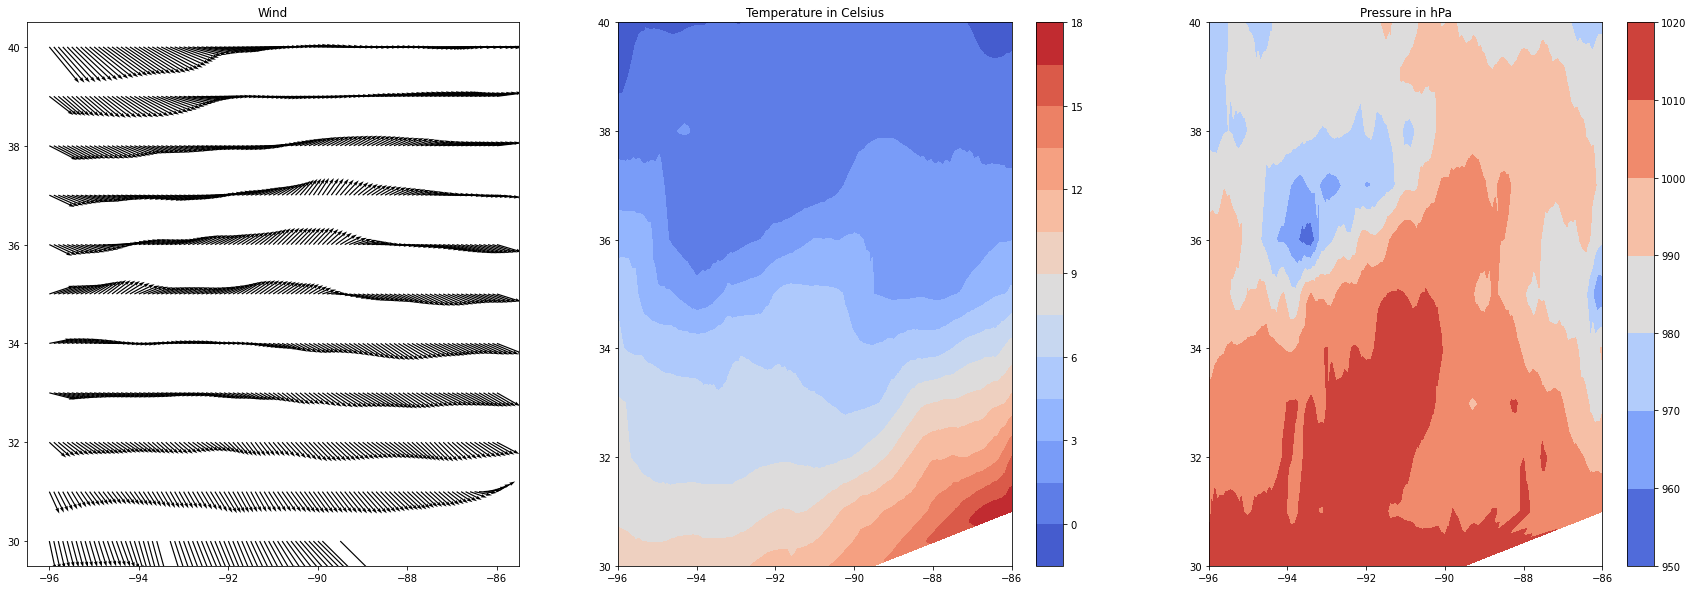

In [107]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(30,10))
ax[0].quiver(X[:,0],X[:,1],Y_wind[:,0],Y_wind[:,1],cmap='hot',scale=50)
ax[0].set_title("Wind")
temp_plot=ax[1].tricontourf(X[:,0],X[:,1],Y_full[:,2]-273,15,cmap='coolwarm')
ax[1].set_title("Temperature in Celsius")
sp_plot=ax[2].tricontourf(X[:,0],X[:,1],Y_full[:,3]/100,cmap='coolwarm')
#fig.clabel(ax[2], inline=1, fontsize=10)
ax[2].set_title("Pressure in hPa")

fig.colorbar(temp_plot, ax=ax[1])
fig.colorbar(sp_plot, ax=ax[2])



In [98]:
X

array([[-96. ,  40. ],
       [-95.7,  40. ],
       [-95.4,  40. ],
       ...,
       [-91.2,  30.1],
       [-90.9,  30.1],
       [-90.6,  30.1]])